In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [65]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(w*x+b)))

In [66]:
w=0.9
b=0.1
X=np.linspace(-10,10,100)
Y=sigmoid(w,X,b)

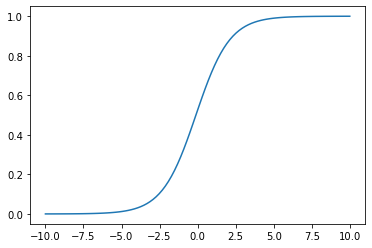

In [67]:
plt.plot(X,Y)

In [68]:
def sigmoid3d(w1,w2,x1,x2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [69]:
x1=np.linspace(-10,10,100)
x2=np.linspace(-10,10,100)
xx1,xx2=np.meshgrid(x1,x2)
print(x1.shape,x2.shape,xx1.shape,xx2.shape)

(100,) (100,) (100, 100) (100, 100)


In [70]:
w1,w2,b=0.5,0.5,0
y=sigmoid3d(w1,w2,xx1,xx2,b)

Text(0.5, 0, 'z')

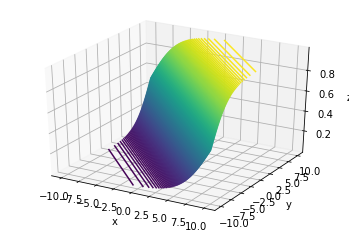

In [71]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(xx1,xx2,y,200,cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

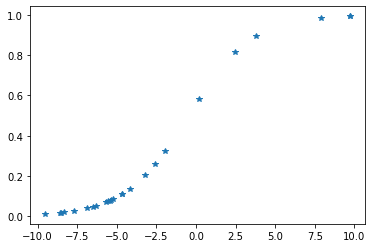

In [72]:
w_unkown,b_unknown=0.5,0.25
X=np.random.random(25)*20-10
Y=sigmoid(X,w_unkown,b_unknown)
plt.plot(X,Y,'*')

In [73]:

def calculate_loss(X,Y,w_est,b_est):
    loss=0
    for x,y in zip(X,Y):
        loss+=(y-sigmoid(x,w_est,b_est))**2
    return loss

W=np.linspace(-1,1,100)
B=np.linspace(-1,1,100)


WW,BB=np.meshgrid(W,B)
Loss=np.zeros(WW.shape)
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j]=calculate_loss(X,Y,WW[i,j],BB[i,j])
        

C:\Users\ANKUR SINGH\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0, 'z')

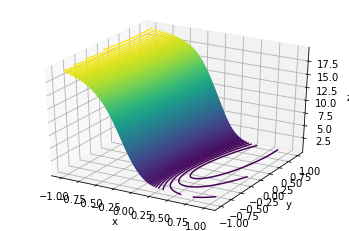

In [74]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(WW,BB,Loss,200,cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [75]:
ij=np.argmin(Loss)
i=int(ij/Loss.shape[1])
j=int(ij-i*Loss.shape[1])
print(WW[i,j],BB[i,j])

0.49494949494949503 0.2323232323232325


In [76]:
Loss.shape

(100, 100)

In [77]:
ind = np.unravel_index(np.argmin(Loss, axis=None), Loss.shape)
print(WW[ind],BB[ind])

0.49494949494949503 0.2323232323232325


In [138]:
class SigmoidNeuron:
    def __init__(self):
        self.w=None
        self.b=None
    
    def perceptron(self,x):
        return np.dot(self.w,x)+self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def grad_b(self,x,y):
        ypred=self.sigmoid(self.perceptron(x))
        return (ypred-y)*ypred*(1-ypred)
    
    def grad_w(self,x,y):
        ypred=self.sigmoid(self.perceptron(x))
        return (ypred-y)*ypred*(1-ypred)*x
    
    def fit(self,X,Y,epochs=1,lr=1,initialise=True):
        if initialise:
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
        
        for i in notebook.tqdm(range(epochs),total=epochs,unit="epoch"):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+=self.grad_w(x,y)
                db+=self.grad_b(x,y)
            
            self.w=self.w-lr*dw
            self.b=self.b-lr*db
    
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [139]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
Y=[1,1,1,0,0,0]
sn=SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)


In [140]:
print(sn.w,sn.b)

[[ 0.22109699 -1.38421466]] [0.00134101]


In [141]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import notebook
import pandas as pd

In [142]:
breast_cancer=sklearn.datasets.load_breast_cancer()
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
data['class']=breast_cancer.target
X=data.drop('class',axis=1)
Y=data['class']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(569, 30) (455, 30) (114, 30)
(569,) (455,) (114,)


In [143]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [144]:
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [149]:
sn=SigmoidNeuron()
sn.fit(X_scaled_train,Y_train,epochs=5000,lr=0.01)

In [150]:
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)

In [151]:
Y_pred_binarised_train=np.array([1 if p >= 0.5 else 0 for p in Y_pred_train])
Y_pred_binarised_test=np.array([1 if p >= 0.5 else 0 for p in Y_pred_test])

In [152]:
from sklearn.metrics import accuracy_score
accuracy_train=accuracy_score(Y_pred_binarised_train,Y_train)
accuracy_test=accuracy_score(Y_pred_binarised_test,Y_test)
print(accuracy_train,accuracy_test)

0.9934065934065934 0.9824561403508771
